## Importing Libraries

In [247]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [248]:
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial import Voronoi, voronoi_plot_2d

## Loading the dataset

In [249]:
iris = load_iris()

In [250]:
type(iris)

sklearn.utils.Bunch

In [251]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [252]:
iris.data.shape

(150, 4)

In [253]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [254]:
all_features = []
features = iris.data[:, [0,1,2,3]]
features.shape

(150, 4)

In [255]:
for observation in features:
  all_features.append([observation[0] + observation[1] + observation[2] + observation[3]])
print(all_features)

[[10.2], [9.5], [9.4], [9.399999999999999], [10.2], [11.4], [9.700000000000001], [10.1], [8.9], [9.6], [10.8], [9.999999999999998], [9.299999999999999], [8.5], [11.2], [12.000000000000002], [11.000000000000002], [10.3], [11.5], [10.7], [10.7], [10.700000000000001], [9.399999999999999], [10.599999999999998], [10.299999999999999], [9.799999999999999], [10.4], [10.399999999999999], [10.2], [9.7], [9.7], [10.700000000000001], [10.9], [11.299999999999999], [9.7], [9.599999999999998], [10.5], [10.0], [8.9], [10.2], [10.100000000000001], [8.4], [9.1], [10.7], [11.2], [9.5], [10.699999999999998], [9.399999999999999], [10.7], [9.9], [16.299999999999997], [15.600000000000001], [16.4], [13.100000000000001], [15.4], [14.3], [15.9], [11.600000000000001], [15.4], [13.200000000000001], [11.5], [14.600000000000001], [13.2], [15.1], [13.4], [15.600000000000001], [14.6], [13.6], [14.4], [13.1], [15.700000000000003], [14.2], [15.200000000000001], [14.799999999999997], [14.900000000000002], [15.4], [15.79

In [256]:
# reshaping the target variable after assigning the target from the dataset
targets = iris.target
targets.reshape(targets.shape[0],-1)
targets.shape

(150,)

In [257]:
# copying this raw data into a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["species"] = iris.target

In [258]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [259]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [260]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]>

In [261]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# K-Means Clustering

In [262]:
X_new1 = np.asanyarray(all_features)
X_new1 = X_new1.reshape(-1,1)

In [263]:
X_new1.shape

(150, 1)

In [264]:
y = iris.target
y.shape

(150,)

In [265]:
X_new2 = df.iloc[:, 0:5]
Y_new2 = df["species"]

In [266]:
X2_train, X2_test, y_train, y_test = train_test_split(X_new2, Y_new2, test_size=0.4, random_state=0)
print(" X2_train",X2_train)
print("X2_test",X2_test)
print("y_train",y_train)
print("y_test",y_test)

 X2_train      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
85                 6.0               3.4  ...               1.6        1
30                 4.8               3.1  ...               0.2        0
101                5.8               2.7  ...               1.9        2
94                 5.6               2.7  ...               1.3        1
64                 5.6               2.9  ...               1.3        1
..                 ...               ...  ...               ...      ...
9                  4.9               3.1  ...               0.1        0
103                6.3               2.9  ...               1.8        2
67                 5.8               2.7  ...               1.0        1
117                7.7               3.8  ...               2.2        2
47                 4.6               3.2  ...               0.2        0

[90 rows x 5 columns]
X2_test      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
114       

In [267]:
kmeans = KMeans(n_clusters=3, max_iter =1000)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [268]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [269]:
df[' K Mean predicted label'] = kmeans.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,K Mean predicted label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# Plotting Blobs using the Iris dataset

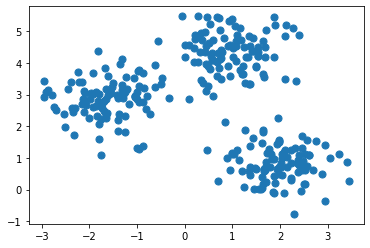

In [270]:
X_new1, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_new1[:, 0], X_new1[:, 1], s=50)

In [271]:
kmeans.inertia_

78.85144142614601

In [272]:
km8 = KMeans(n_clusters=8, max_iter =1000)

In [273]:
km8.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [274]:
km8.cluster_centers_

array([[6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ]])

In [275]:
df[' K Mean predicted label'] = km8.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,K Mean predicted label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,7
2,4.7,3.2,1.3,0.2,0,7
3,4.6,3.1,1.5,0.2,0,7
4,5.0,3.6,1.4,0.2,0,1


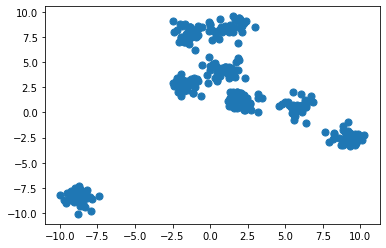

In [276]:
X_new8, y_true = make_blobs(n_samples=300, centers=8,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_new8[:, 0], X_new8[:, 1], s=50);

In [277]:
km8.inertia_

30.1865551948052

In [278]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

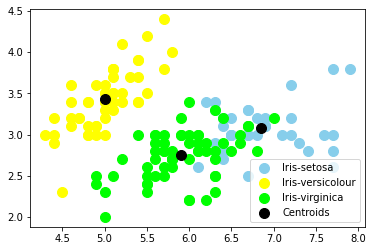

In [279]:
#Visualising all the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'skyblue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'lime', label = 'Iris-virginica')

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

In [280]:
kmeans2 = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(x)
kmeans2.cluster_centers_

array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.2       , 2.36666667, 3.38333333, 1.01666667],
       [5.62272727, 2.70909091, 4.11818182, 1.28636364],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895]])

In [281]:
df[' K Mean predicted label'] = kmeans2.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,K Mean predicted label
0,5.1,3.5,1.4,0.2,0,5
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,5


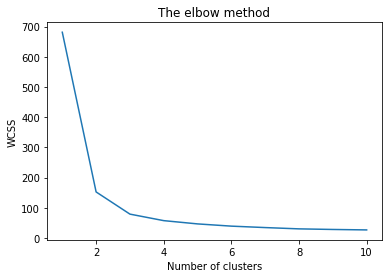

In [282]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results on a line graph which could help in visualizing and figuring out the elbow
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

The elbow-k value is 3

# Gaussian Mixture Model Classifier

In [283]:
num_clusters = 4;
gmm = GaussianMixture(n_components = num_clusters)
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [284]:
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

In [285]:
wh1 = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

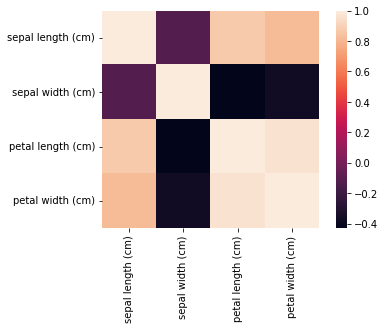

In [286]:
# To calculate the correlation among the above variables
corrr = wh1.corr()
sns.heatmap(corr, square = True)

In [287]:
def doGMM(x, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(x)
    cluster_labels3 = model.predict(x)
    return (cluster_labels3)

cluster_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(cluster_labels3)

## Voronoi plots

In [288]:
km8 = KMeans(n_clusters=8, max_iter =1000)

In [289]:
km8.fit(X_vor)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [290]:
centers2= km8.cluster_centers_

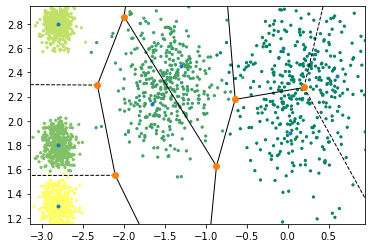

In [291]:
vor = Voronoi(centers2) 
voronoi_plot_2d(vor) 
plt.scatter(X_vor[:, 0], X_vor[:, 1], c=y_vor, s=5, cmap='summer')

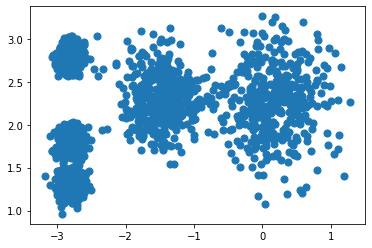

In [292]:
X_vor, y_vor = make_blobs(n_samples=2000, centers= np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]), cluster_std= np.array([0.4, 0.3, 0.1, 0.1, 0.1]), random_state=0)
plt.scatter(X_vor[:, 0], X_vor[:, 1], s=50);

In [293]:
km8 = KMeans(n_clusters=8, max_iter =1000)

In [294]:
km8.fit(X_vor)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [295]:
centers2= km8.cluster_centers_

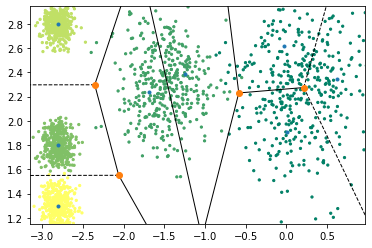

In [296]:
vor = Voronoi(centers2) 
voronoi_plot_2d(vor) 
plt.scatter(X_vor[:, 0], X_vor[:, 1], c=y_vor, s=5, cmap='summer')

Reporting the value of np.sum(y_pred==y) / len(y_pred)

In [297]:
df_data = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_target = pd.DataFrame(data=iris.target, columns=["class"])
df_target = np.array(df_target).reshape(150,)
np.sum(y_cluster_gmm==df_target) / len(y_cluster_gmm)

0.37333333333333335

Predicting labels for X_new

In [298]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

In [299]:
km_new = KMeans(n_clusters=3,random_state=0)
km_new.fit(X2_train)

print(y_new_result)

[0 2 1 1]


In [300]:
y_new_result = km_new.fit_predict(X_new)

In [301]:
y_new_result

array([0, 2, 1, 1], dtype=int32)

Inertia comparision for k = 3 and k = 8

In [302]:
print("For k = 3: ", kmeans.inertia_)
print("For k = 8: ", km8.inertia_)

For k = 3:  26.53452922077922
For k = 8:  122.00033993639722


Since the inertia for k = 3 has a lower value, k = 3 seems to be a better model, and also since it has lesser number of clusters

In [303]:
from scipy import stats
from scipy.stats import mstats
stats.mode(y_cluster_gmm)
mstats.mode(y_cluster_gmm)

ModeResult(mode=array([0.]), count=array([50.]))